# (c) - Fitting a logistic regression model for the probability of diverted flights

In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix,
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter


In [2]:
df1 = pd.read_csv(r'/Users/Pavan/Documents/3rd year SGs and material/Programming for data science/Coursework Datasets/2007.csv', usecols = ['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','Origin','Dest','Distance','UniqueCarrier','Diverted'])
df2 = pd.read_csv(r'/Users/Pavan/Documents/3rd year SGs and material/Programming for data science/Coursework Datasets/2006.csv', usecols = ['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','Origin','Dest','Distance','UniqueCarrier','Diverted'])
main_dataset = pd.concat([df1,df2])
del df1, df2

In [3]:
main_dataset.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'UniqueCarrier', 'Origin', 'Dest', 'Distance', 'Diverted'],
      dtype='object')

In [4]:
main_dataset.shape

(14595137, 11)

In [5]:
pd.isnull(main_dataset).sum(axis = 0)

Year             0
Month            0
DayofMonth       0
DayOfWeek        0
CRSDepTime       0
CRSArrTime       0
UniqueCarrier    0
Origin           0
Dest             0
Distance         0
Diverted         0
dtype: int64

Hence there are no empty/null values

/var/folders/_9/slybx61s08zct3hzzt02lhyw0000gp/T/ipykernel_47779/2500840480.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(main_dataset.corr(), annot=True)


<Axes: >

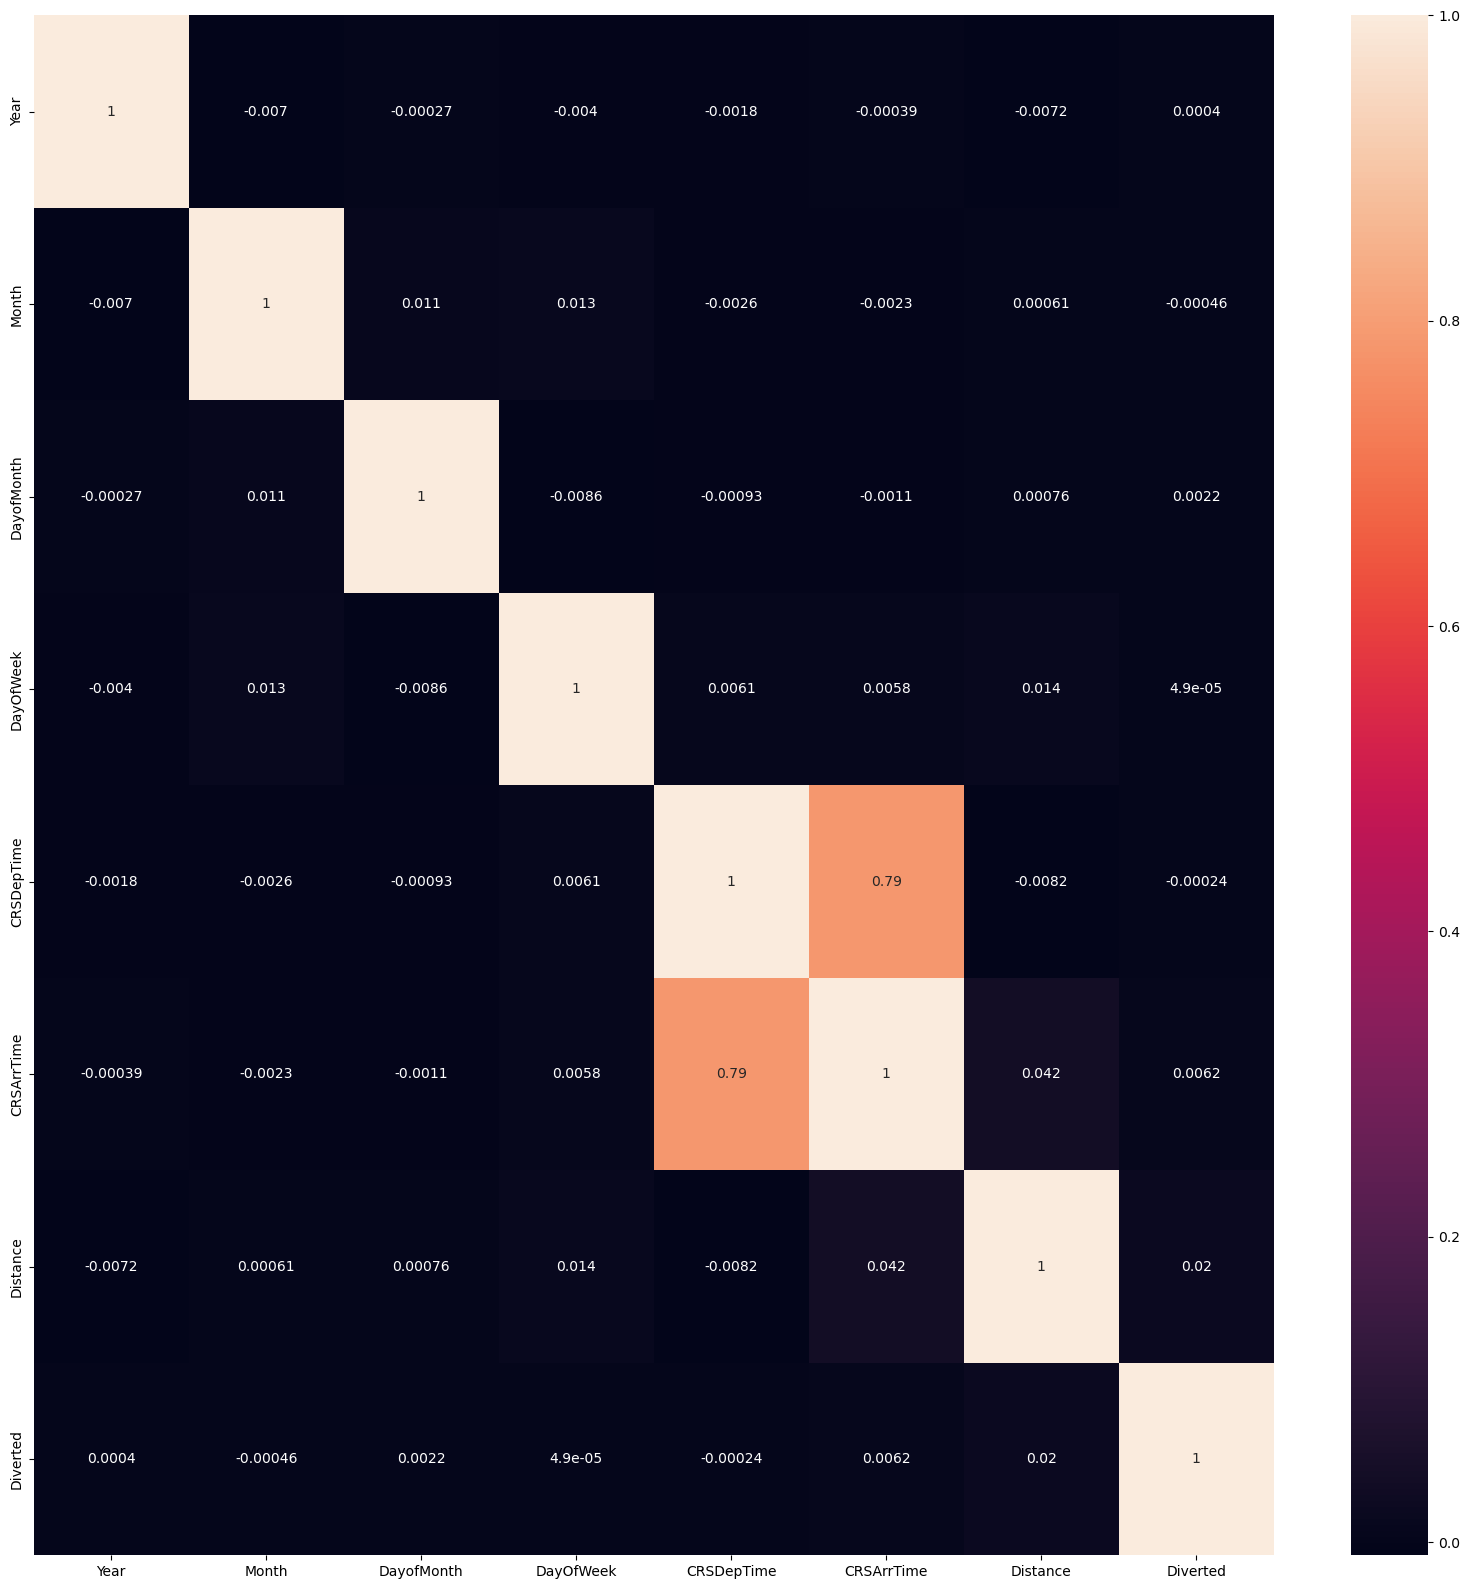

In [6]:
plt.figure(figsize = (20,20))
sns.heatmap(main_dataset.corr(), annot=True)

There are no real correlations between columns, hence collinearility is not an issue and we don't have to consider dropping a column

Since this is a machine learning model all data in the dataset should be numeric. The UniqueCarrier, Origin and Dest column are not numeric and are instead categoric. Hence we will use categorical coding to convert these columns to numeric values in place

In [10]:

main_dataset['UniqueCarrier'] = main_dataset['UniqueCarrier'].astype('category')
main_dataset['UniqueCarrier'] = main_dataset['UniqueCarrier'].cat.codes

main_dataset['Origin'] = main_dataset['Origin'].astype('category')
main_dataset['Origin'] = main_dataset['Origin'].cat.codes

main_dataset['Dest'] = main_dataset['Dest'].astype('category')
main_dataset['Dest'] = main_dataset['Dest'].cat.codes

In [11]:
main_dataset.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,Origin,Dest,Distance,Diverted
0,2007,1,1,1,1225,1340,18,272,219,389,0
1,2007,1,1,1,1905,2035,18,272,225,479,0
2,2007,1,1,1,2130,2300,18,272,225,479,0
3,2007,1,1,1,1200,1330,18,272,225,479,0
4,2007,1,1,1,830,1000,18,272,225,479,0


In [12]:
print((main_dataset['Diverted'] == 0).sum())
print((main_dataset['Diverted'] == 1).sum())

14561772
33365


In [13]:
#To observe the ratio of diverted to non diverted flights
ratio = (main_dataset['Diverted'] == 1).sum()/(main_dataset['Diverted'] == 0).sum()
print(ratio)

0.0022912733422827936


Now splitting the data into the two years to then create the logistic regression model for each year
Firstly doing it for flights in 2006

In [14]:
main_dataset_2006 = main_dataset[main_dataset['Year'] == 2006]
main_dataset_2007 = main_dataset[main_dataset['Year'] == 2007]
del main_dataset

In [15]:
X_2006 = main_dataset_2006.drop(columns=['Diverted','Year'])
#Note that year is dropped because it has no impact on prediciting whether a flight is diverted is not since all flights are from the same year
Y_2006 = main_dataset_2006['Diverted']

In [16]:
X_train_2006, X_test_2006, Y_train_2006, Y_test_2006 = train_test_split(X_2006, Y_2006, test_size=0.3, random_state=21)

In [17]:
#Performing under and oversampling on training data, to get training data that is more evenly split on diverted and not-diverted flights
over_2006 = RandomOverSampler(sampling_strategy={0: Counter(Y_train_2006)[0], 1: 4000000})

X1_2006, Y1_2006 = over_2006.fit_resample(X_train_2006, Y_train_2006)

under_2006 = RandomUnderSampler(sampling_strategy={0: 15082, 1: 15082})

X2_2006, Y2_2006 = under_2006.fit_resample(X1_2006, Y1_2006)

In [18]:
model_2006 = LogisticRegression(max_iter=1000)
model_2006.fit(X2_2006, Y2_2006)

LogisticRegression(max_iter=1000)

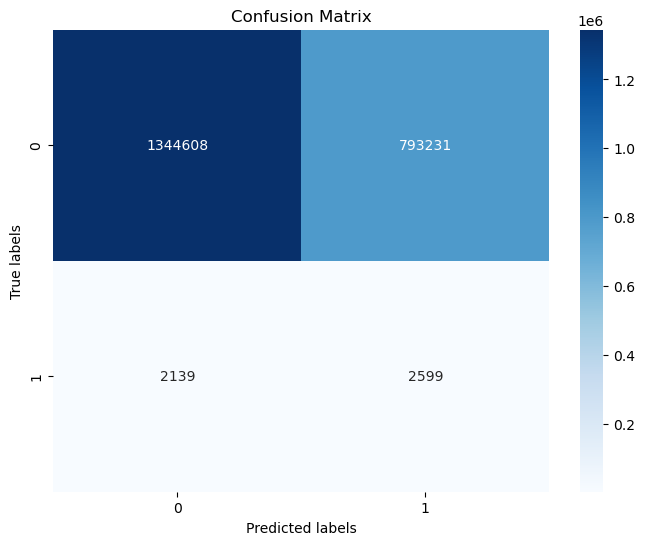

In [19]:
#Visualizing the confusion matrix
y_pred_2006 = model_2006.predict(X_test_2006)

conf_matrix_2006 = confusion_matrix(Y_test_2006, y_pred_2006)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2006, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [20]:
def check_accuracy(Y_test, pred):
    print("Accuracy : {}%".format(accuracy_score(Y_test, pred)*100))
    print("Precision: {}%".format(precision_score(Y_test, pred)*100))
    print("Recall   : {}%".format(recall_score(Y_test, pred)*100))
    print("F1       : {}%".format(f1_score(Y_test, pred)*100))
    print("=======================================================")

predictions = model_2006.predict(X_test_2006)
check_accuracy(Y_test_2006, predictions)

Accuracy : 62.87788023487604%
Precision: 0.32657728409333653%
Recall   : 54.85436893203883%
F1       : 0.6492890048065874%


Now for the year 2007

In [21]:
X_2007 = main_dataset_2007.drop(columns=['Diverted','Year'])
Y_2007 = main_dataset_2007['Diverted']

In [22]:
X_train_2007, X_test_2007, Y_train_2007, Y_test_2007 = train_test_split(X_2007, Y_2007, test_size=0.3, random_state=21)

In [23]:
over_2007 = RandomOverSampler(sampling_strategy={0: Counter(Y_train_2007)[0], 1: 4000000})

X1_2007, Y1_2007 = over_2007.fit_resample(X_train_2007, Y_train_2007)

under_2007 = RandomUnderSampler(sampling_strategy={0: 15082, 1: 15082})

X2_2007, Y2_2007 = under_2007.fit_resample(X1_2007, Y1_2007)

In [24]:
model_2007 = LogisticRegression(max_iter=1000)
model_2007.fit(X2_2007, Y2_2007)

LogisticRegression(max_iter=1000)

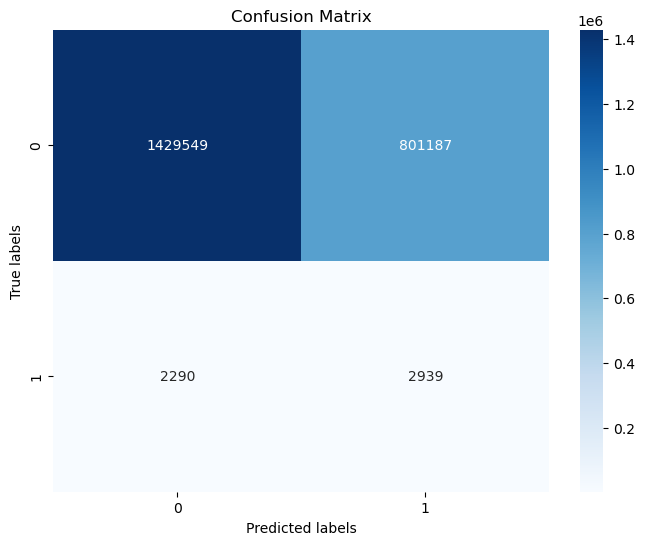

In [25]:
y_pred_2007 = model_2007.predict(X_test_2007)

conf_matrix_2007 = confusion_matrix(Y_test_2007, y_pred_2007)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2007, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [26]:
predictions = model_2007.predict(X_test_2007)
check_accuracy(Y_test_2007, predictions)

Accuracy : 64.0657613155841%
Precision: 0.365489985400298%
Recall   : 56.205775482883915%
F1       : 0.7262573283664152%


Now, Visualizing the coefficients for both years in the same graph to compare

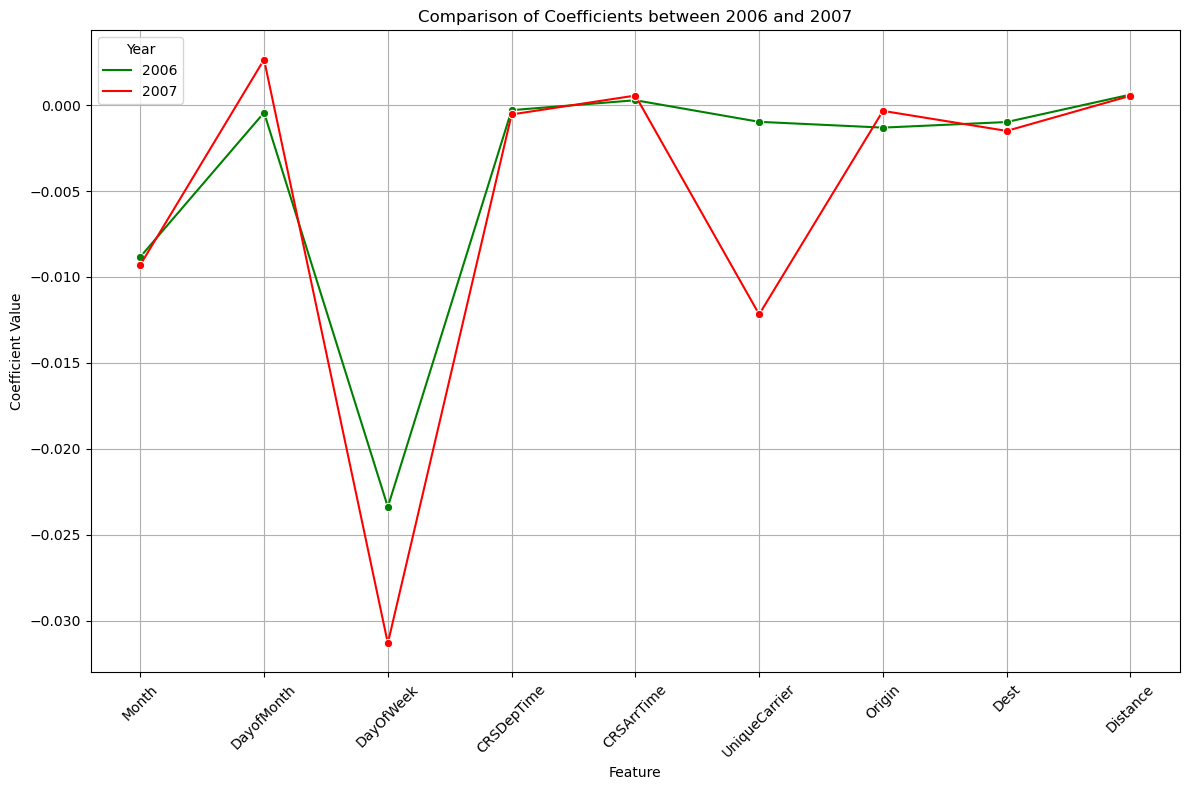

In [30]:
#Extracting coefficients for the year 2006
coefficients_2006 = pd.DataFrame({'Feature': X_train_2006.columns, 'Coefficient': model_2006.coef_[0], 'Year': 2006})

#Extracting coefficients for the year 2007
coefficients_2007 = pd.DataFrame({'Feature': X_train_2007.columns, 'Coefficient': model_2007.coef_[0], 'Year': 2007})

#Concatenating the coefficients for both years into a single dataframe
all_coefficients = pd.concat([coefficients_2006, coefficients_2007])

all_coefficients['Year'] = all_coefficients['Year'].astype(str)

#Plotting the coefficients for both years
plt.figure(figsize=(12, 8))
sns.lineplot(data=all_coefficients, x='Feature', y='Coefficient', hue='Year', marker='o', palette={'2006': 'green', '2007': 'red'})
plt.title('Comparison of Coefficients between 2006 and 2007')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()
